In [212]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
import pickle

In [108]:
df=pd.read_csv("C:\\Users\\singh\\OneDrive\\Documents\\Bootcamp\\Problem Statement 3\\Data\\customer_churn.csv")

In [109]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [162]:
## check if any null values
df[df.isna().any(axis=1)]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [111]:
df.groupby(['Churn'])['Churn'].count()

Churn
No     5174
Yes    1869
Name: Churn, dtype: int64

<Axes: title={'center': 'Churn count'}, xlabel='Churn'>

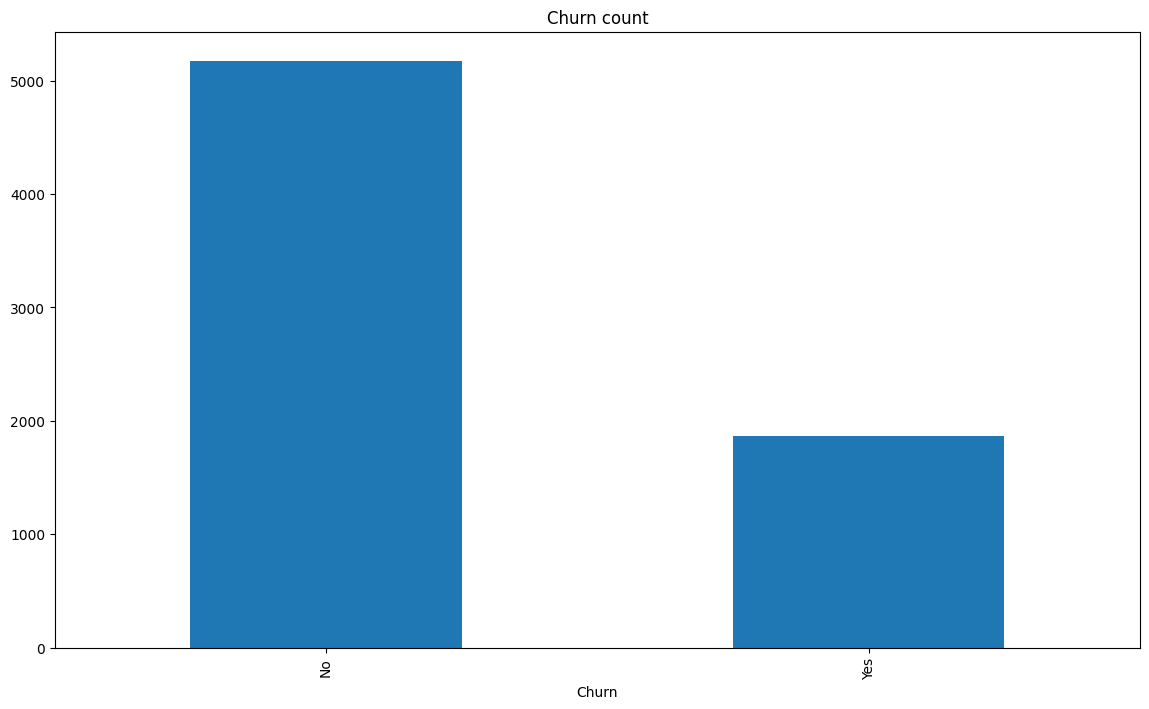

In [112]:
df.groupby(['Churn'])['Churn'].count().plot.bar(title="Churn count", figsize=(14,8))


In [113]:
df.groupby(['gender'])['Churn'].count()

gender
Female    3488
Male      3555
Name: Churn, dtype: int64

<Axes: title={'center': 'Churn wise churn count'}, xlabel='gender'>

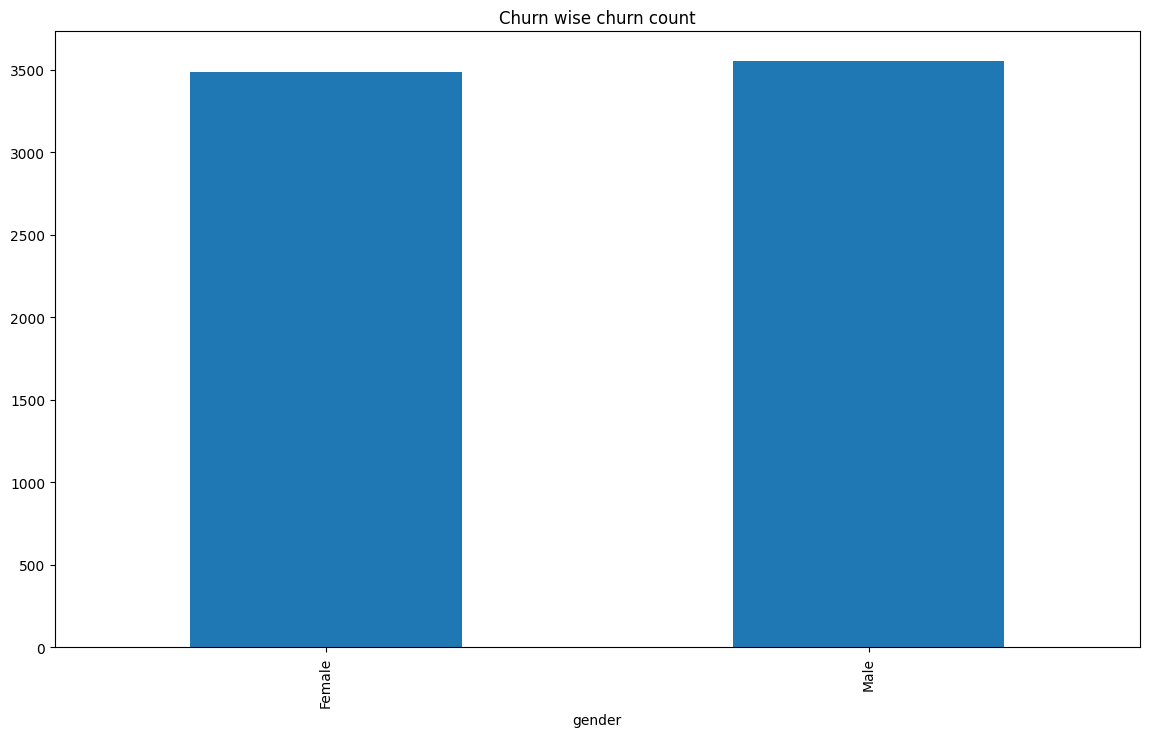

In [114]:
df.groupby(['gender'])['Churn'].count().plot.bar(title=titles, figsize=(14,8))

<Axes: title={'center': 'Churn wise churn count'}, xlabel='SeniorCitizen'>

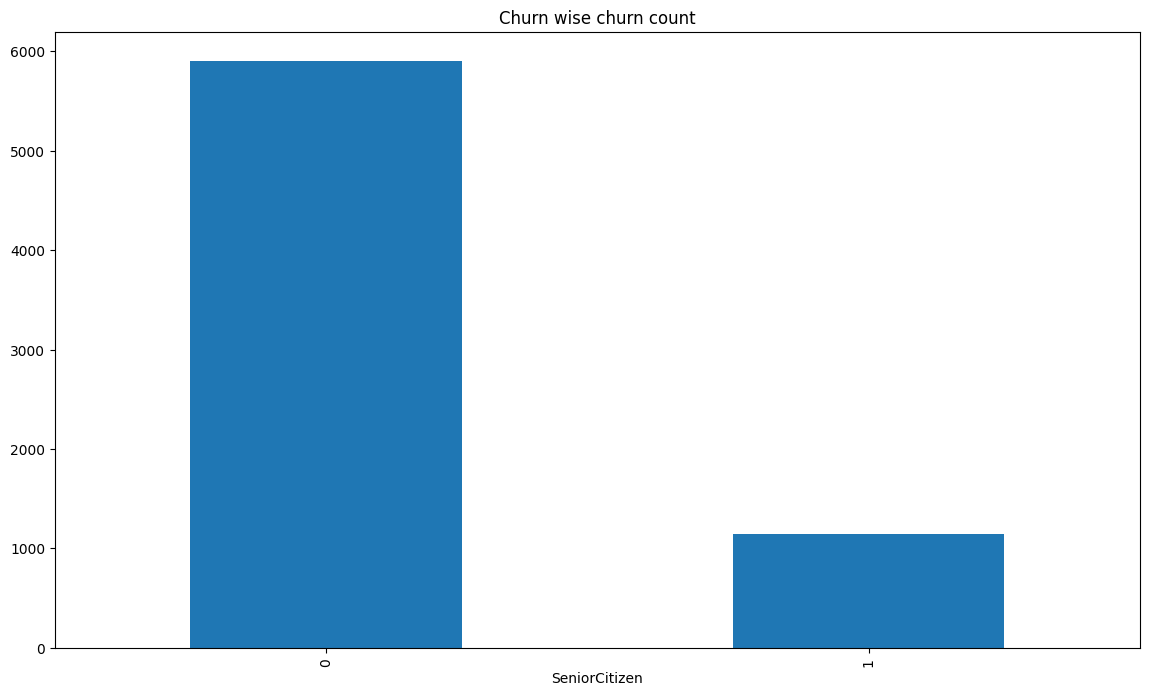

In [86]:
df.groupby(['SeniorCitizen'])['Churn'].count().plot.bar(title=titles, figsize=(14,8))

<Axes: title={'center': 'Churn wise churn count'}, xlabel='Partner'>

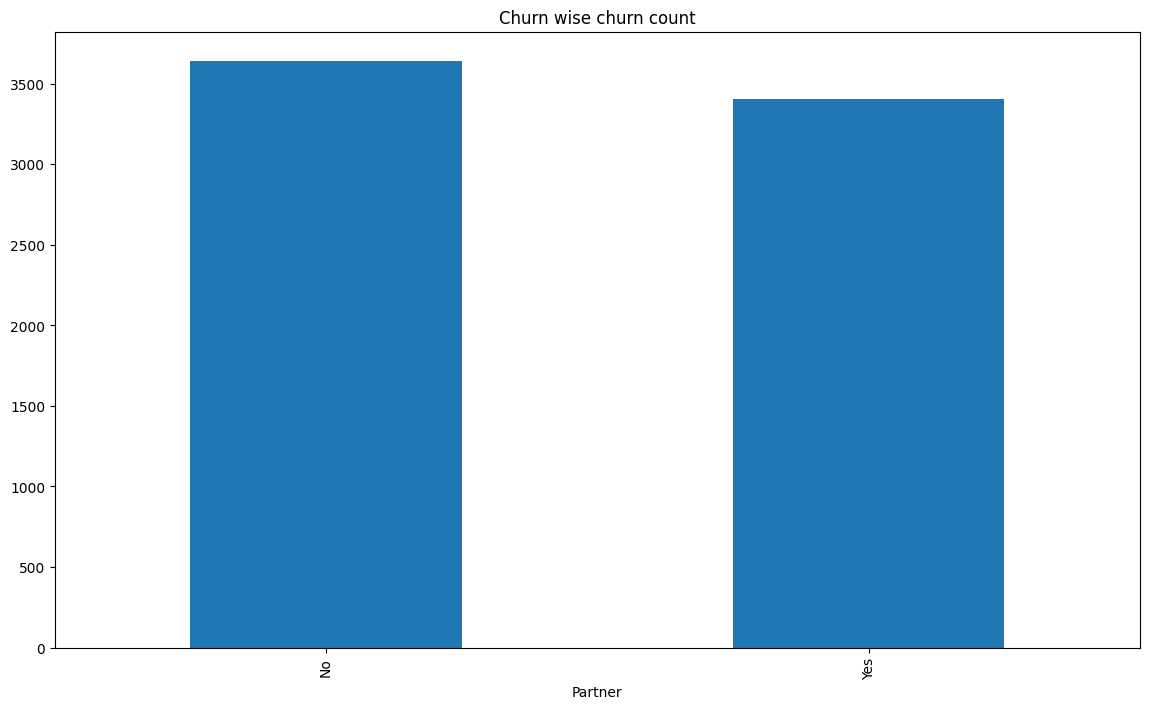

In [115]:
df.groupby(['Partner'])['Churn'].count().plot.bar(title=titles, figsize=(14,8))

<Axes: title={'center': 'Churn wise churn count'}, xlabel='Dependents'>

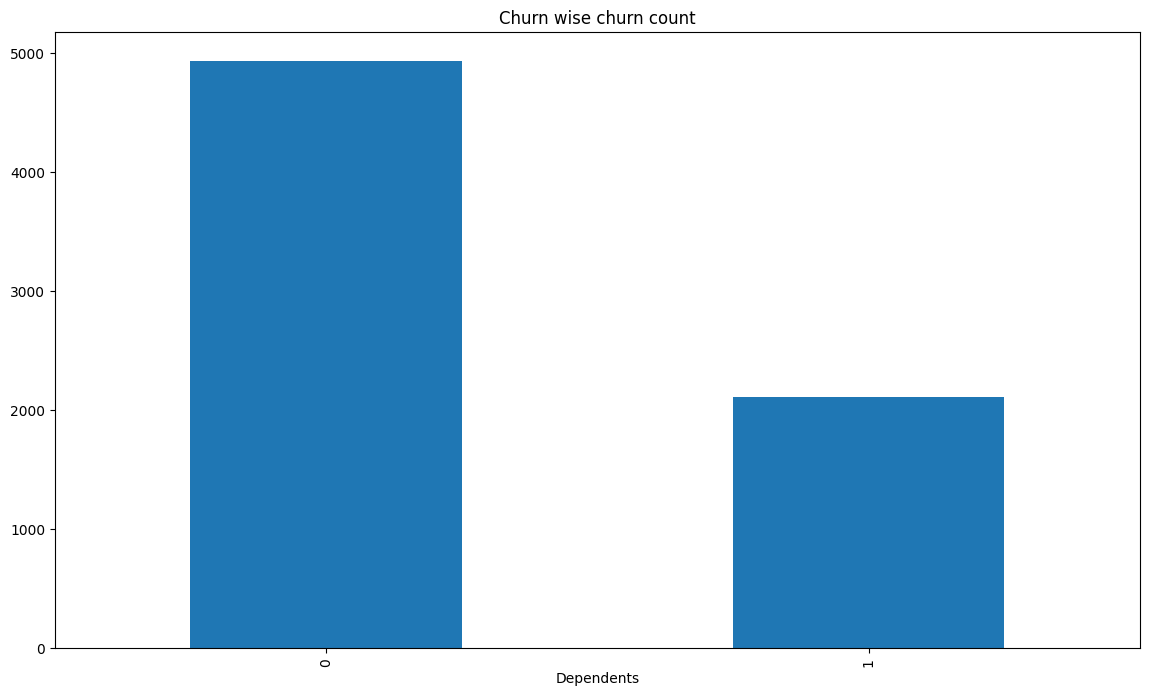

In [88]:
df.groupby(['Dependents'])['Churn'].count().plot.bar(title=titles, figsize=(14,8))

In [206]:
## change to categorical field and check proportion 
for col in df.columns:
    if df[col].nunique() < 6 :
        df[col]=df[col].astype('category')
        print(df[col].value_counts(normalize=True))
print(df.dtypes)

gender
1    0.504756
0    0.495244
Name: proportion, dtype: float64
SeniorCitizen
0    0.837853
1    0.162147
Name: proportion, dtype: float64
Partner
0    0.516967
1    0.483033
Name: proportion, dtype: float64
Dependents
0    0.700412
1    0.299588
Name: proportion, dtype: float64
PhoneService
1    0.903166
0    0.096834
Name: proportion, dtype: float64
MultipleLines
0    0.481329
2    0.421837
1    0.096834
Name: proportion, dtype: float64
InternetService
1    0.439585
0    0.343746
2    0.216669
Name: proportion, dtype: float64
OnlineSecurity
0    0.496663
2    0.286668
1    0.216669
Name: proportion, dtype: float64
OnlineBackup
0    0.438450
2    0.344881
1    0.216669
Name: proportion, dtype: float64
DeviceProtection
0    0.439443
2    0.343888
1    0.216669
Name: proportion, dtype: float64
TechSupport
0    0.493114
2    0.290217
1    0.216669
Name: proportion, dtype: float64
StreamingTV
0    0.398978
2    0.384353
1    0.216669
Name: proportion, dtype: float64
StreamingMovies
0 

In [207]:
df['TotalCharges'].skew()

0.963789093641489

In [208]:
## impute totalcharges value 
### since data is bit positively skewed we will take median instead of mean
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].median())


<Axes: >

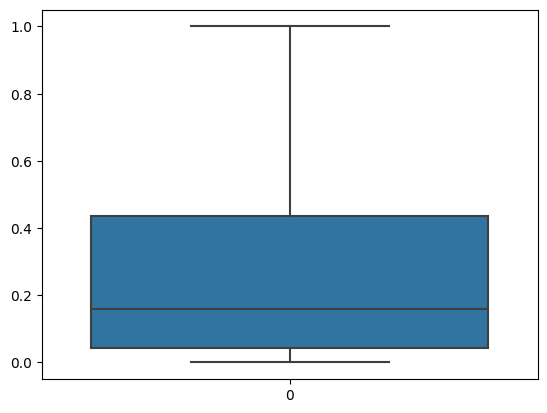

In [209]:
import seaborn as sns
sns.boxplot(df['TotalCharges'])

<Axes: >

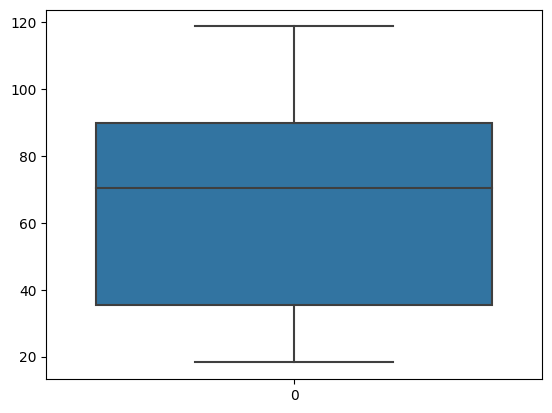

In [129]:
import seaborn as sns
sns.boxplot(df['MonthlyCharges'])

<Axes: >

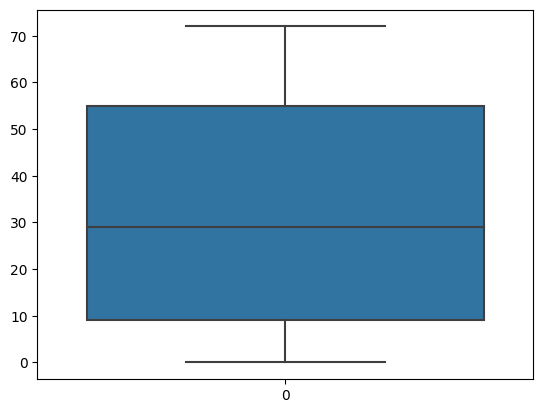

In [130]:
import seaborn as sns
sns.boxplot(df['tenure'])

In [214]:
### encoding categorical columns (can be label encoding or one hot encoding(pd.get_dummies(df, columns=["gender"]).head()))
for col in df.columns:
    if df[col].dtype=='category':
        #df[col] = df[col].cat.codes
        
        label_encoder = preprocessing.LabelEncoder()
        
        df[col]=label_encoder.fit_transform(df[col])
        df[col]=df[col].astype('category')
        filename=col+".pkl"
        pickle.dump(label_encoder, open(filename,'wb'))
        

In [215]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.013889,0,1,0,0,2,0,0,0,0,0,1,2,0.115423,0.001275,0
1,1,0,0,0,0.472222,1,0,0,2,0,2,0,0,0,1,0,3,0.385075,0.215867,0
2,1,0,0,0,0.027778,1,0,0,2,2,0,0,0,0,0,1,3,0.354229,0.010310,1
3,1,0,0,0,0.625000,0,1,0,2,0,2,2,0,0,1,0,0,0.239303,0.210241,0
4,0,0,0,0,0.027778,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.015330,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.333333,1,2,0,2,0,2,2,2,2,1,1,3,0.662189,0.227521,0
7039,0,0,1,1,1.000000,1,2,1,0,2,2,0,2,2,1,1,1,0.845274,0.847461,0
7040,0,0,1,1,0.152778,0,1,0,2,0,0,0,0,0,0,1,2,0.112935,0.037809,0
7041,1,1,1,0,0.055556,1,2,1,0,0,0,0,0,0,0,1,3,0.558706,0.033210,1


In [153]:
## drop primary key column
df.drop(['customerID'],axis=1,inplace=True)


KeyError: "['customerID'] not found in axis"

In [205]:
df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure              float64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [155]:
for col in df.columns:
    if df[col].nunique() < 6 :
        df[col]=df[col].astype('category')
        

In [156]:
df.dtypes

gender              category
SeniorCitizen       category
Partner             category
Dependents          category
tenure               float64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object

In [157]:
for col in df.columns:
    if df[col].dtype!='category':
        minmax = MinMaxScaler()
        df[col]=minmax.fit_transform(df[[col]])
        

In [158]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.013889,0,1,0,0,2,0,0,0,0,0,1,2,0.115423,0.001275,0
1,1,0,0,0,0.472222,1,0,0,2,0,2,0,0,0,1,0,3,0.385075,0.215867,0
2,1,0,0,0,0.027778,1,0,0,2,2,0,0,0,0,0,1,3,0.354229,0.010310,1
3,1,0,0,0,0.625000,0,1,0,2,0,2,2,0,0,1,0,0,0.239303,0.210241,0
4,0,0,0,0,0.027778,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.015330,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.333333,1,2,0,2,0,2,2,2,2,1,1,3,0.662189,0.227521,0
7039,0,0,1,1,1.000000,1,2,1,0,2,2,0,2,2,1,1,1,0.845274,0.847461,0
7040,0,0,1,1,0.152778,0,1,0,2,0,0,0,0,0,0,1,2,0.112935,0.037809,0
7041,1,1,1,0,0.055556,1,2,1,0,0,0,0,0,0,0,1,3,0.558706,0.033210,1


In [163]:
## stratified sampling to maintain the ratio
X,Y=df.loc[:, ~df.columns.isin(['Churn'])],df.loc[:, df.columns.isin(['Churn'])]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33,stratify=Y, random_state=42)

In [164]:
Y['Churn'].value_counts(normalize=True)

Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

In [ ]:
## logistic regression 

In [165]:
logreg = LogisticRegression()

In [166]:
logreg.fit(X_train, Y_train)

C:\Users\singh\OneDrive\Documents\Bootcamp\Problem Statement 3\bootcamp_case3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [167]:
y_pred = logreg.predict(X_test)

In [169]:
logreg.score(X_test, Y_test)

0.8008602150537635

In [171]:

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1708
           1       0.65      0.54      0.59       617

    accuracy                           0.80      2325
   macro avg       0.75      0.72      0.73      2325
weighted avg       0.79      0.80      0.79      2325



In [178]:
### parameter tuning
#model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = [ 'l1', 'l2', 'elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=logreg, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, Y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.802884 using {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}


C:\Users\singh\OneDrive\Documents\Bootcamp\Problem Statement 3\bootcamp_case3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
750 fits failed out of a total of 1350.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\singh\OneDrive\Documents\Bootcamp\Problem Statement 3\bootcamp_case3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\singh\OneDrive\Documents\Bootcamp\Problem Statement 3\bootcamp_case3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self

In [181]:
model=LogisticRegression(C=1,penalty='l2',solver='newton-cg')

In [182]:
model.fit(X_train,Y_train)

C:\Users\singh\OneDrive\Documents\Bootcamp\Problem Statement 3\bootcamp_case3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, solver='newton-cg')

In [184]:
y_pred=model.predict(X_test)

In [185]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1708
           1       0.65      0.54      0.59       617

    accuracy                           0.80      2325
   macro avg       0.75      0.72      0.73      2325
weighted avg       0.79      0.80      0.80      2325



In [188]:
### randomforest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train, Y_train)
y_pred=rf.predict(X_test)
rf.score(X_test, Y_test)

C:\Users\singh\AppData\Local\Temp\ipykernel_20796\1055092346.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


0.7823655913978494

In [189]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1708
           1       0.62      0.47      0.53       617

    accuracy                           0.78      2325
   macro avg       0.72      0.68      0.70      2325
weighted avg       0.77      0.78      0.77      2325



In [190]:
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, Y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

ValueError: Invalid parameter 'max_features' for estimator LogisticRegression(C=1, solver='newton-cg'). Valid parameters are: ['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'].

In [192]:
print(minmax)

MinMaxScaler()


In [ ]:
def main():
    #Setting Application title
    st.title('Telco Customer Churn Prediction App')

      #Setting Application description
    st.markdown("""
     :dart:  This Streamlit app is made to predict customer churn in a ficitional telecommunication use case.
    The application is functional for both online prediction and batch data prediction. n
    """)
    st.markdown("<h3></h3>", unsafe_allow_html=True)

    #Setting Application sidebar default
    
    add_selectbox = st.sidebar.selectbox(
    "How would you like to predict?", ("Online", "Batch"))
    st.sidebar.info('This app is created to predict Customer Churn')

    
   
    st.info("Input data below")
    #Based on our optimal features selection
    st.subheader("Demographic data")
    seniorcitizen = st.selectbox('Senior Citizen:', ('Yes', 'No'))
    dependents = st.selectbox('Dependent:', ('Yes', 'No'))
    st.subheader("Payment data")
    tenure = st.slider('Number of months the customer has stayed with the company', min_value=0, max_value=72, value=0)
    contract = st.selectbox('Contract', ('Month-to-month', 'One year', 'Two year'))
    paperlessbilling = st.selectbox('Paperless Billing', ('Yes', 'No'))
    PaymentMethod = st.selectbox('PaymentMethod',('Electronic check', 'Mailed check', 'Bank transfer (automatic)','Credit card (automatic)'))
    monthlycharges = st.number_input('The amount charged to the customer monthly', min_value=0, max_value=150, value=0)
    totalcharges = st.number_input('The total amount charged to the customer',min_value=0, max_value=10000, value=0)
    st.subheader("Services signed up for")
    mutliplelines = st.selectbox("Does the customer have multiple lines",('Yes','No','No phone service'))
    phoneservice = st.selectbox('Phone Service:', ('Yes', 'No'))
    internetservice = st.selectbox("Does the customer have internet service", ('DSL', 'Fiber optic', 'No'))
    onlinesecurity = st.selectbox("Does the customer have online security",('Yes','No','No internet service'))
    onlinebackup = st.selectbox("Does the customer have online backup",('Yes','No','No internet service'))
    techsupport = st.selectbox("Does the customer have technology support", ('Yes','No','No internet service'))
    streamingtv = st.selectbox("Does the customer stream TV", ('Yes','No','No internet service'))
    streamingmovies = st.selectbox("Does the customer stream movies", ('Yes','No','No internet service'))
    data = {
            'SeniorCitizen': seniorcitizen,
            'Dependents': dependents,
            'tenure':tenure,
            'PhoneService': phoneservice,
            'MultipleLines': mutliplelines,
            'InternetService': internetservice,
            'OnlineSecurity': onlinesecurity,
            'OnlineBackup': onlinebackup,
            'TechSupport': techsupport,
            'StreamingTV': streamingtv,
            'StreamingMovies': streamingmovies,
            'Contract': contract,
            'PaperlessBilling': paperlessbilling,
            'PaymentMethod':PaymentMethod,
            'MonthlyCharges': monthlycharges,
            'TotalCharges': totalcharges
            }
    features_df = pd.DataFrame.from_dict([data])
    st.markdown("<h3></h3>", unsafe_allow_html=True)
    st.write('Overview of input is shown below')
    st.markdown("<h3></h3>", unsafe_allow_html=True)
    st.dataframe(features_df)
    #Preprocess inputs
    preprocess_df = preprocess(features_df, 'Online')
    prediction = model.predict(preprocess_df)
    if st.button('Predict'):
        if prediction == 1:
            st.warning('Yes, the customer will terminate the service.')
        else:
            st.success('No, the customer is happy with Telco Services.')


   
if __name__ == '__main__':
        main()

In [217]:
ls=['a','b']
ls=ls+[]'c'

AttributeError: 'str' object has no attribute 'tolist'